In [1]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/outbreak_detect.csv')

In [2]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


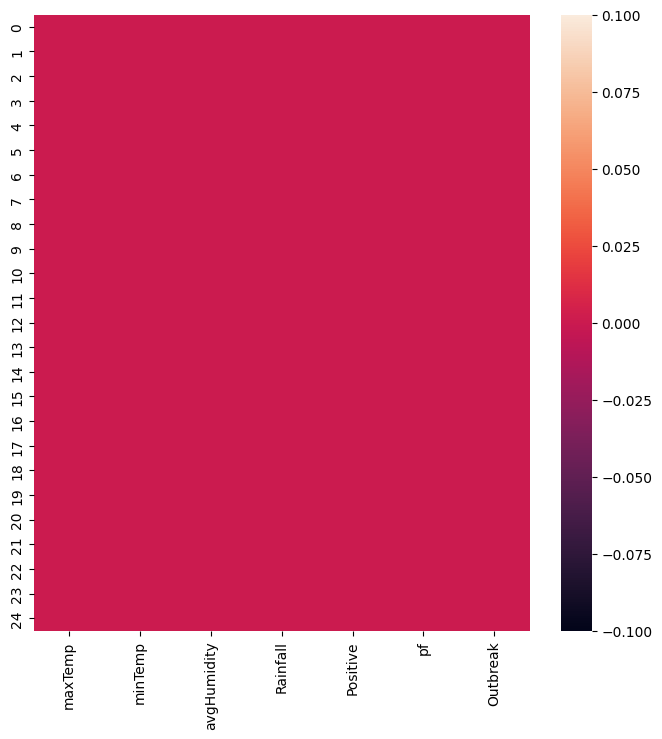

In [8]:
# visualizing

import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(8,8))
  sns.heatmap(df.isnull())
  return plt.show()
  

get_heatmap(df)

In [5]:
#DataPreprocessing

#removing NaN values

import math
mean_maxTemp=df['maxTemp'].mean()

mean_minTemp=df['minTemp'].mean()

df['maxTemp']=df['maxTemp'].fillna(mean_maxTemp)
df['minTemp']=df['minTemp'].fillna(mean_minTemp)

df=df.drop(25, axis=0)

In [9]:

from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

df.Outbreak=LE.fit_transform(df.Outbreak)

In [10]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.000000,18.00,49.74,0.00,2156,112,0
1,34.000000,23.00,83.27,15.22,10717,677,1
2,40.000000,23.00,50.74,0.00,1257,127,0
3,33.458333,24.00,84.57,11.15,9693,482,0
4,34.000000,24.00,59.16,9.06,4198,211,0
5,34.000000,27.00,73.23,0.00,11808,712,1
6,31.000000,24.00,88.77,41.40,10881,648,1
7,33.000000,24.00,77.94,23.88,8830,459,1
8,31.000000,24.00,84.57,11.15,9693,482,0
9,36.000000,24.00,53.40,2.12,9310,549,0


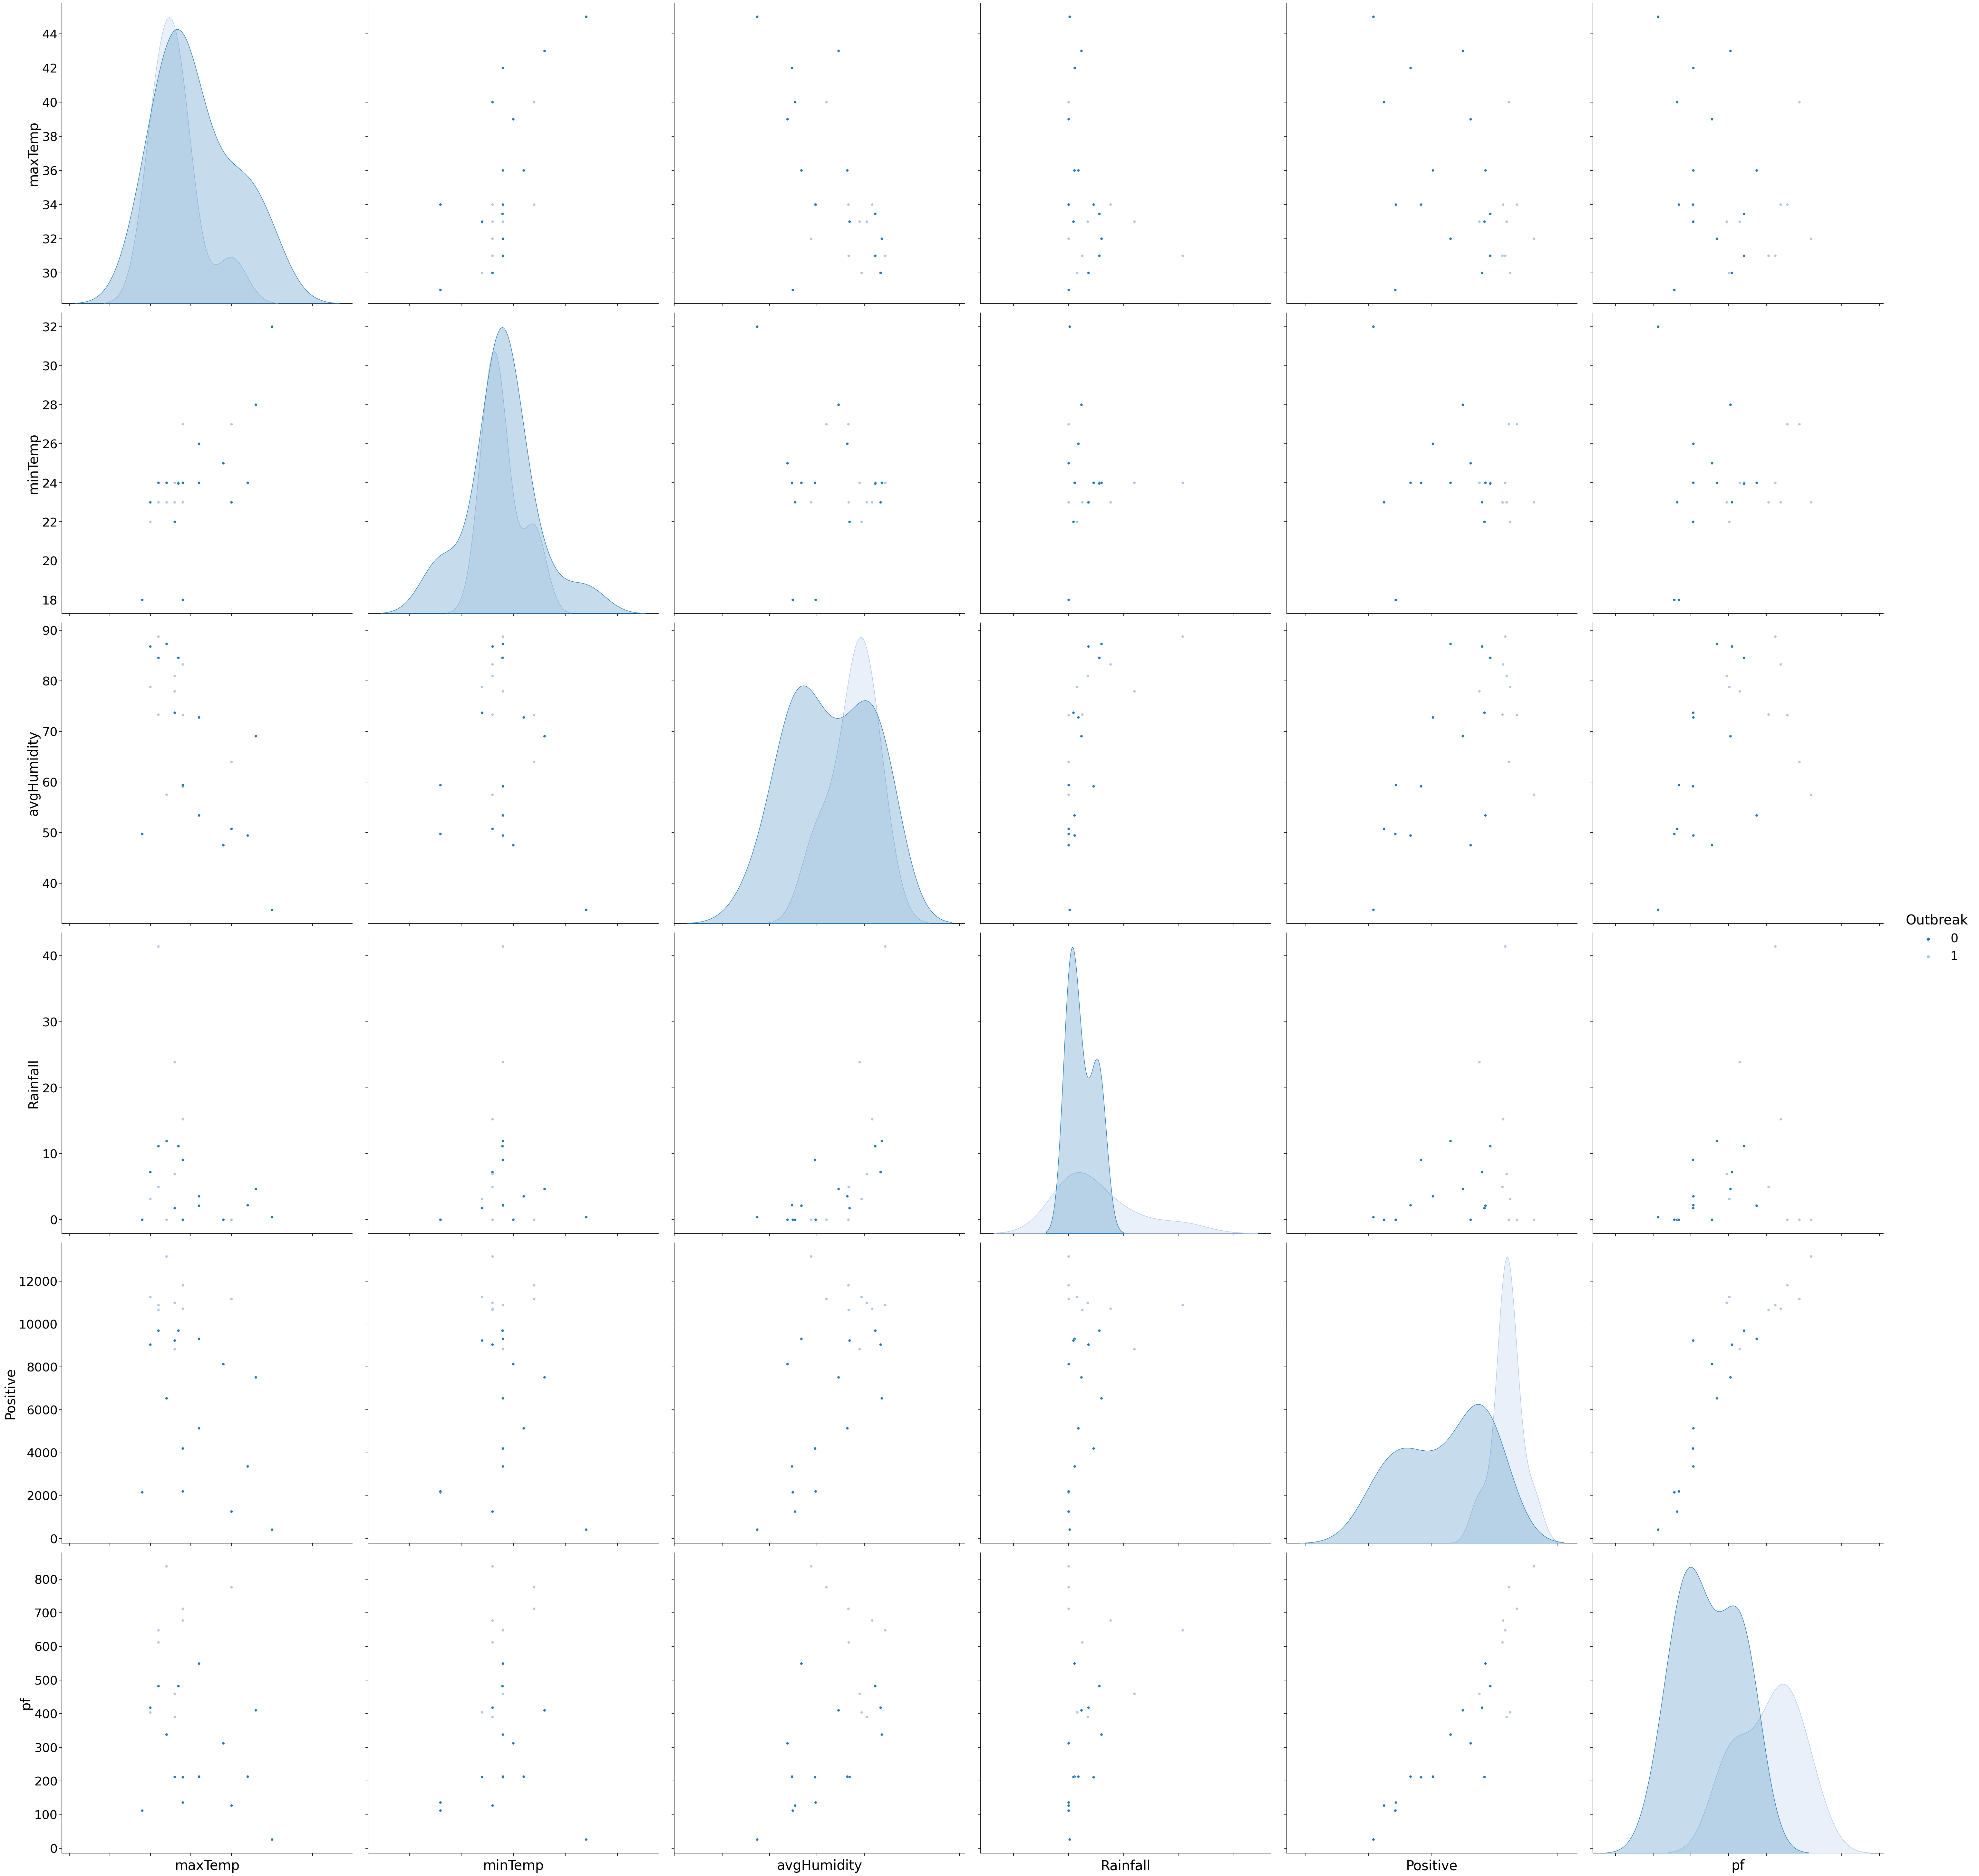

In [16]:
with sns.plotting_context("notebook",font_scale=2.5):
  g=sns.pairplot(df,hue='Outbreak',palette='tab20',height=10)

g.set(xticklabels=[])


In [22]:
import numpy as np

#loading the data
X=np.array(df[['maxTemp',	'minTemp',	'avgHumidity',	'Rainfall',	'Positive',	'pf']])
Y=np.array(df[['Outbreak']])

In [24]:
#splitting data into test and train
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()

In [26]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
Y_pred=clf.predict(X_test)


In [28]:
clf.score(X,Y)

1.0

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#confusion matrix for train set

cm1=confusion_matrix(Y_train,clf.predict(X_train))
cm1

array([[12,  0],
       [ 0,  8]])

In [35]:
#confusion matrix for test set

cm2=confusion_matrix(Y_test,clf.predict(X_test))

cm2

array([[4, 0],
       [0, 1]])

In [37]:
#confusion matrix for overall data
actual=Y
predicted=clf.predict(X)

cm=confusion_matrix(actual,predicted)
cm

array([[16,  0],
       [ 0,  9]])

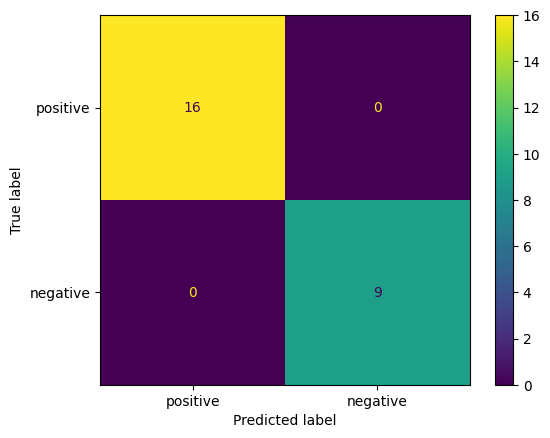

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['positive','negative'])
cm_display.plot()

In [41]:
print(classification_report(actual,predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         9

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

